In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib



In [2]:
# Load the data
df_efficiency = pd.read_csv('Eff_Score.csv')
df_efficiency.head()



,FlightID,Departure Airport,Arrival Airport,Route via,Fuel Consumption (W=6) kg/100km,Air Traffic Congestion (W=4),No.Step Climbs (W=5) [x],Aircraft Load Factor (W=4) %age,Projected Flight Time (W=5),Maintenance Status (W=3),Efficiency Score
0,FL001,BOM,CCU,HYD,29,236,4,50,2,2,48
1,FL002,BLR,IXC,DEL,21,868,2,96,2,1,57
2,FL003,DEL,HYD,BOM,29,230,3,49,2,1,45
3,FL004,BOM,CCU,HYD,25,666,2,59,2,1,53
4,FL005,BLR,IXC,DEL,30,388,4,49,3,2,48


In [3]:
df_efficiency.describe()

,Fuel Consumption (W=6) kg/100km,Air Traffic Congestion (W=4),No.Step Climbs (W=5) [x],Aircraft Load Factor (W=4) %age,Projected Flight Time (W=5),Maintenance Status (W=3),Efficiency Score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,24.414667,592.945333,2.597667,69.694000,2.061000,1.499333,53.916000
std,3.264394,211.871729,1.260552,17.027791,0.535451,0.500083,4.363709
min,19.000000,200.000000,1.000000,45.000000,1.000000,1.000000,45.000000
25%,22.000000,431.000000,2.000000,54.000000,2.000000,1.000000,53.000000
50%,24.000000,583.000000,2.000000,69.000000,2.000000,1.000000,55.000000
75%,27.000000,755.000000,3.000000,84.000000,2.000000,2.000000,57.000000
max,30.000000,1000.000000,6.000000,100.000000,3.000000,2.000000,60.000000


In [4]:
# # Encode categorical features
# label_encoders = {}
# for column in ['Departure Airport', 'Arrival Airport', 'Route via']:
#     le = LabelEncoder()
#     df_efficiency[column] = le.fit_transform(df_efficiency[column])
#     label_encoders[column] = le



In [5]:
# Select relevant features and target variable
# features_efficiency = ['Departure Airport', 'Arrival Airport', 'Route via', 
#                        'Fuel Consumption (W=6) kg/100km', 'Air Traffic Congestion (W=4)', 
#                        'No.Step Climbs (W=5) [x]', 'Aircraft Load Factor (W=4) %age', 
#                        'Projected Flight Time (W=5)', 'Maintenance Status (W=3)']
features_efficiency = ['Fuel Consumption (W=6) kg/100km', 'Air Traffic Congestion (W=4)', 
                       'No.Step Climbs (W=5) [x]', 'Aircraft Load Factor (W=4) %age', 
                       'Projected Flight Time (W=5)', 'Maintenance Status (W=3)']
X_efficiency = df_efficiency[features_efficiency]
y_efficiency = df_efficiency['Efficiency Score']



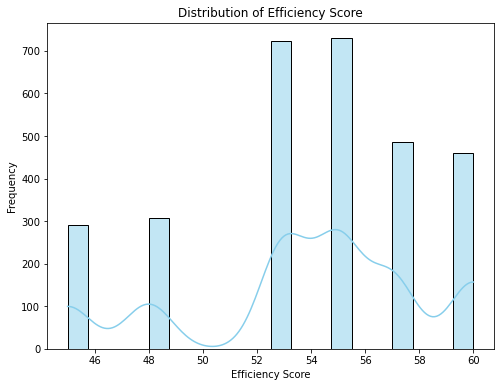

In [6]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(y_efficiency, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Efficiency Score')
plt.xlabel('Efficiency Score')
plt.ylabel('Frequency')
plt.show()



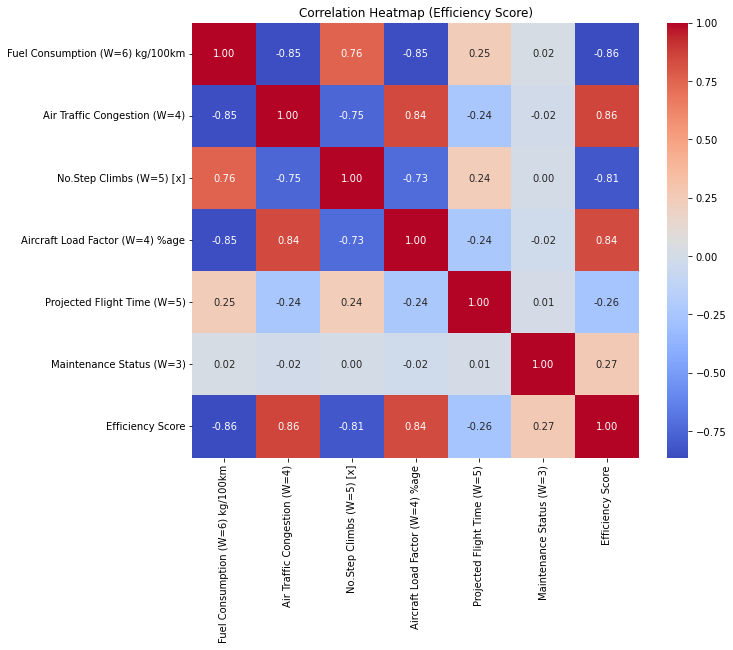

In [7]:
# Calculate the correlation matrix
correlation_matrix_efficiency = df_efficiency[features_efficiency + ['Efficiency Score']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_efficiency, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Efficiency Score)')
plt.show()


In [8]:
# Split the data
X_train_efficiency, X_test_efficiency, y_train_efficiency, y_test_efficiency = train_test_split(X_efficiency, y_efficiency, test_size=0.2, random_state=42)


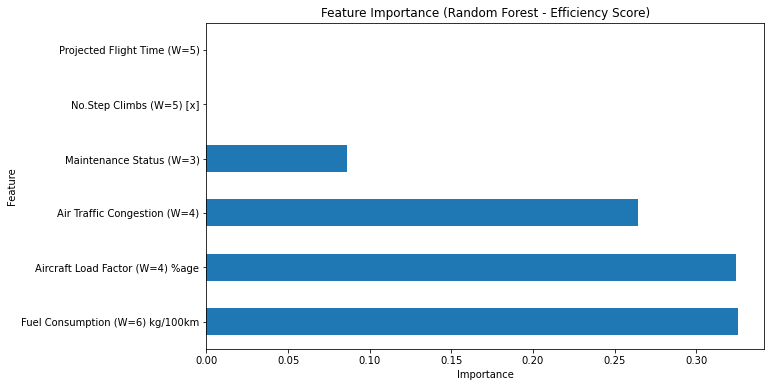

In [9]:
# Train and evaluate Random Forest Regressor
rf_model_efficiency = RandomForestRegressor(random_state=42)
rf_model_efficiency.fit(X_train_efficiency, y_train_efficiency)

# Visualize feature importance for Random Forest
plt.figure(figsize=(10, 6))
feat_importances_efficiency = pd.Series(rf_model_efficiency.feature_importances_, index=X_efficiency.columns)
feat_importances_efficiency.nlargest(10).plot(kind='barh')
plt.title('Feature Importance (Random Forest - Efficiency Score)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


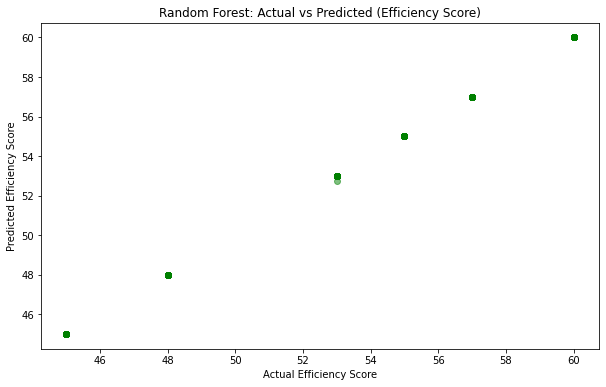

In [10]:
# Evaluate the Random Forest Regressor
rf_pred_efficiency = rf_model_efficiency.predict(X_test_efficiency)
rf_mae_efficiency = mean_absolute_error(y_test_efficiency, rf_pred_efficiency)
rf_mse_efficiency = mean_squared_error(y_test_efficiency, rf_pred_efficiency)
rf_r2_efficiency = r2_score(y_test_efficiency, rf_pred_efficiency)

# Visualize the predictions made by Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test_efficiency, rf_pred_efficiency, color='green', alpha=0.5)
plt.title('Random Forest: Actual vs Predicted (Efficiency Score)')
plt.xlabel('Actual Efficiency Score')
plt.ylabel('Predicted Efficiency Score')
plt.show()


In [11]:
# Print evaluation metrics for Random Forest
print("\nRandom Forest Regressor Evaluation (Efficiency Score):")
print(f"Mean Absolute Error: {rf_mae_efficiency}")
print(f"Mean Squared Error: {rf_mse_efficiency}")
print(f"R-squared: {rf_r2_efficiency}")



Random Forest Regressor Evaluation (Efficiency Score):
Mean Absolute Error: 0.0004000000000000033
Mean Squared Error: 9.600000000000159e-05
R-squared: 0.9999948426254618


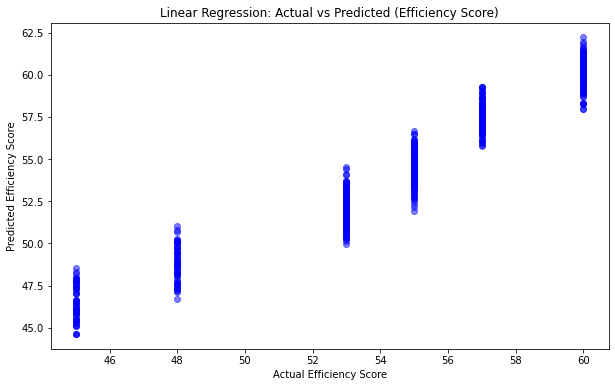

In [12]:
# Train and evaluate Linear Regression model
lr_model_efficiency = LinearRegression()
lr_model_efficiency.fit(X_train_efficiency, y_train_efficiency)

# Evaluate the Linear Regression model
lr_pred_efficiency = lr_model_efficiency.predict(X_test_efficiency)
lr_mae_efficiency = mean_absolute_error(y_test_efficiency, lr_pred_efficiency)
lr_mse_efficiency = mean_squared_error(y_test_efficiency, lr_pred_efficiency)
lr_r2_efficiency = r2_score(y_test_efficiency, lr_pred_efficiency)

# Visualize the predictions made by Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_efficiency, lr_pred_efficiency, color='blue', alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted (Efficiency Score)')
plt.xlabel('Actual Efficiency Score')
plt.ylabel('Predicted Efficiency Score')
plt.show()



In [13]:
print("\nLinear Regression Model Evaluation for Efficiency:")
print(f"Mean Absolute Error: {lr_mae_efficiency}")
print(f"Mean Squared Error: {lr_mse_efficiency}")
print(f"R-squared: {lr_r2_efficiency}")



Linear Regression Model Evaluation for Efficiency:
Mean Absolute Error: 0.9850568307575179
Mean Squared Error: 1.5198110680769952
R-squared: 0.9183517197355356


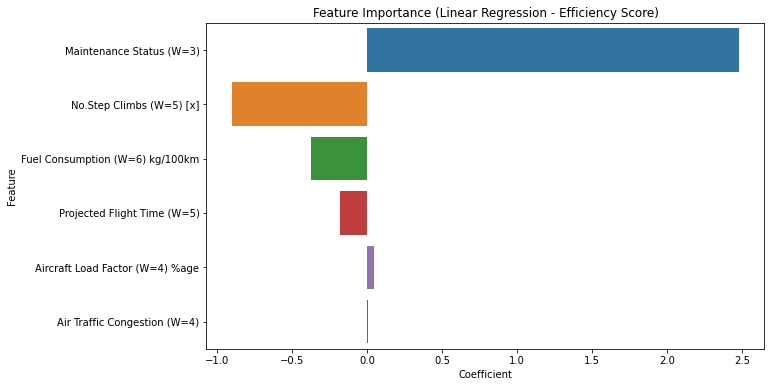

In [14]:
# Get the coefficients of the Linear Regression model
lr_coefficients_efficiency = lr_model_efficiency.coef_

# Create a DataFrame to store feature names and their corresponding coefficients
lr_feature_importance_efficiency = pd.DataFrame({'Feature': X_efficiency.columns, 'Coefficient': lr_coefficients_efficiency})

# Sort the coefficients by absolute value in descending order
lr_feature_importance_efficiency = lr_feature_importance_efficiency.reindex(lr_feature_importance_efficiency['Coefficient'].abs().sort_values(ascending=False).index)

# Visualize feature importance for Linear Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lr_feature_importance_efficiency)
plt.title('Feature Importance (Linear Regression - Efficiency Score)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()



In [16]:
# Save the Random Forest model and label encoders
# joblib.dump(rf_model_efficiency, 'rf_model_efficiency.pkl')
# joblib.dump(label_encoders, 'label_encoders_efficiency.pkl')

# Save the Linear Regression model
joblib.dump(lr_model_efficiency, 'lr_model_efficiency.pkl')

['lr_model_efficiency.pkl']